In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

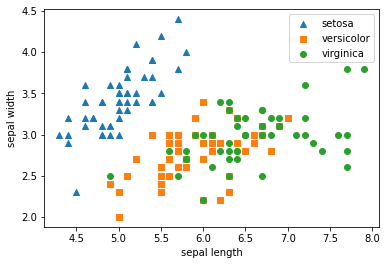

In [3]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [4]:
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    print("{}-{}".format(i, marker))

0-^
1-s
2-o


### PCA 수행하기(n_components = 2로 수행하기)

In [5]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

print(iris_pca.shape)

(150, 2)


In [11]:
pca_columns=['pca_component_1', 'pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(-5)

pca_component_1  pca_component_2  target
0          -2.576120         0.474499       0
1          -2.415322        -0.678092       0
2          -2.659333        -0.348282       0
3          -2.601991        -0.603306       0
4          -2.683744         0.640220       0
..               ...              ...     ...
140         2.359759         0.617183       2
141         2.258347         0.692292       2
142         1.618667        -0.702040       2
143         2.380821         0.871070       2
144         2.346487         1.052123       2

[145 rows x 3 columns]

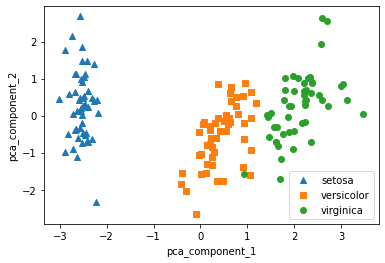

In [13]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [14]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)

# 원본 데이터
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [17]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv =3)
print(scores_pca)
print(np.mean(scores_pca))
# PCA 수행 후 예측 성능이 더 좋아짐.

[0.98 0.98 1.  ]
0.9866666666666667
